In [1]:
import pandas as pd

Грузим данные

In [39]:
df = pd.read_table("L1S5", names=['0', 'date', 'customers6', 'customers13', 'market']).drop(['0'], axis=1)

tmp = df['date'].str.split(pat=', ', expand=True)

df = df.drop(['date'], axis=1)
df['year'] = tmp[0]
df['month'] = tmp[1]

df.head()

,customers6,customers13,market,year,month
0,4942,4882,Epsom,1990,July
1,4895,4736,Epsom,1991,September
2,4805,4784,Epsom,1991,December
3,4570,4603,Epsom,1992,March
4,4506,4629,Epsom,1992,November


Объём выборки

In [42]:
len(df)

45

Описательные статистики

In [45]:
df.customers13.mean()

5017.0

In [46]:
df.customers13.median()

4736.0

In [48]:
df.customers13.var(ddof=0)

1345096.088888889

Статистики для разности

In [53]:
diff = df.customers13 - df.customers6
diff.head()

0    -60
1   -159
2    -21
3     33
4    123
dtype: int64

In [54]:
diff.mean()

46.48888888888889

In [51]:
import scipy.stats as st

In [56]:
st.kurtosis(diff)

4.96387147481753

In [58]:
st.skew(diff)

1.47236056146598

Гистограммы и боксплоты

In [59]:
import matplotlib.pyplot as plt

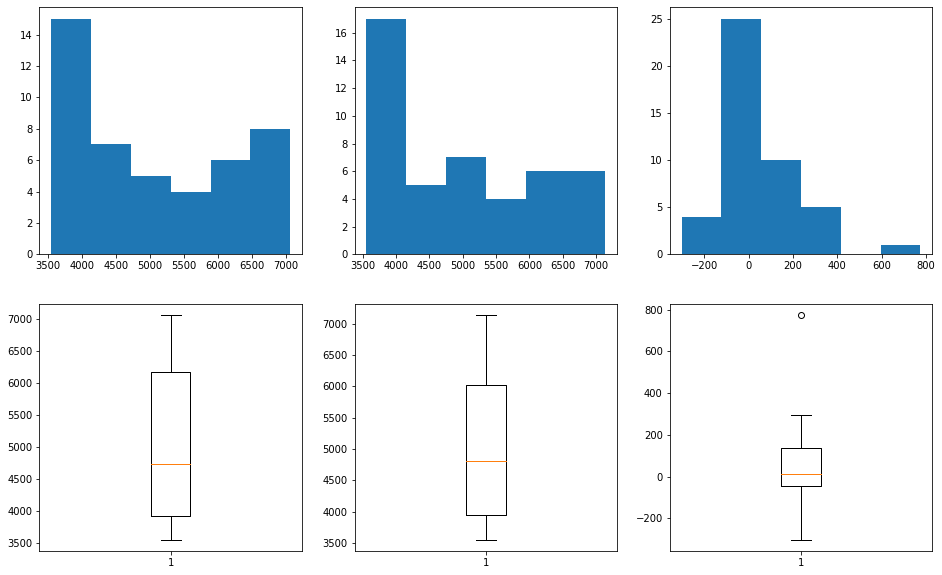

In [82]:
fig, ax = plt.subplots(2, 3, figsize=(16,10))

from math import floor
bins = floor(1.72 * len(df) ** (1 / 3))

ax[0, 0].hist(df.customers13, bins)
ax[0, 1].hist(df.customers6, bins)
ax[0, 2].hist(diff, bins)

ax[1, 0].boxplot(df.customers13)
ax[1, 1].boxplot(df.customers6)
ax[1, 2].boxplot(diff)

plt.show()